# **Applied Statistics Analysis**

##### **Project Type**	- Statistics
##### **Contribution**	- Individual

# **GitHub Link**

* [GitHub profile](https://www.github.com/FirmBase)
* [GitHub project](https://github.com/FirmBase/Applied-Statistics-Analysis.git)

# Customer Purchase Behavior Analysis using Descriptive Statistics

## Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

## Information about dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/view)


This data was gathered during last year's campaign.
Data description is as follows;

1. ***Response*** (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
2. ***ID*** - Unique ID of each customer
3. ***Year_Birth*** - Age of the customer
4. ***Complain*** - 1 if the customer complained in the last 2 years
5. ***Dt_Customer*** - date of customer's enrollment with the company
6. ***Education*** - customer's level of education
7. ***Marital*** - customer's marital status
8. ***Kidhome*** - number of small children in customer's household
9. ***Teenhome*** - number of teenagers in customer's household
10. ***Income*** - customer's yearly household income
11. ***MntFishProducts*** - the amount spent on fish products in the last 2 years
12. ***MntMeatProducts*** - the amount spent on meat products in the last 2 years
13. ***MntFruits*** - the amount spent on fruits products in the last 2 years
14. ***MntSweetProducts*** - amount spent on sweet products in the last 2 years
15. ***MntWines*** - the amount spent on wine products in the last 2 years
16. ***MntGoldProds*** - the amount spent on gold products in the last 2 years
17. ***NumDealsPurchases*** - number of purchases made with discount
18. ***NumCatalogPurchases*** - number of purchases made using catalog (buying goods to be shipped through the mail)
19. ***NumStorePurchases*** - number of purchases made directly in stores
20. ***NumWebPurchases*** - number of purchases made through the company's website
21. ***NumWebVisitsMonth*** - number of visits to company's website in the last month
22. ***Recency*** - number of days since the last purchase





## Import libraries and load dataset

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.preprocessing

### Loading dataset

#### Loading dataset in **Google Colab**

In [3]:
# Load Dataset
# from google.colab import drive		# Mounting the google drive to the colab
# drive.mount('/content/drive')
# df = "/content/drive/Dataset/Superstore Marketing Data - Sheet1.csv"
# df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


#### Loading dataset from **GitHub** respository

In [8]:
import requests
import io

def getFileFromURL(url):
	try:
		response = requests.get(url)
		if response.status_code == 200:
			file = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))
			print(url, "loaded.")
			return file
		else:
			print("CSV fetching failed with response code:", response.status_code)
	except requests.exceptions.HTTPError as err:
		print("HTTP error:", err)
	except Exception as err:
		print("Error:", err)

df = getFileFromURL("https://raw.githubusercontent.com/FirmBase/Applied-Statistics-Analysis/main/Dataset/Superstore%20Marketing%20Data%20-%20Sheet1.csv")
df.head()

https://raw.githubusercontent.com/FirmBase/Applied-Statistics-Analysis/main/Dataset/Superstore%20Marketing%20Data%20-%20Sheet1.csv loaded.


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


## Task 1 - Basic CleanUp

Clean and preprocess the dataset (handling missing values, data types, etc.).

Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

In [2]:
# Remove blank rows
df.dropna(inplace=True)

# Convert it into int
df['Income']=df['Income'].astype('int64')
colum_int16=['Kidhome','Teenhome','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response','Complain']
colum_int32=['MntWines','MntFruits','Recency','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df[colum_int16]=df[colum_int16].astype('Int16')
df[colum_int32]=df[colum_int32].astype('Int32')

# Filtering date and formatting
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda cell: pd.NaT if cell == '########' else cell)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.dropna(inplace=True)
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691,0,0,2014-03-17,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564,0,0,2014-01-29,0,769,...,15,34,65,1,10,10,7,6,1,0


In [3]:
# Converting Year_birth column into datetime year format
df['Year_Birth']=pd.to_datetime(df['Year_Birth'],format='%Y')

# Creating a column age and fill it
df['Age'] = (df['Dt_Customer'].dt.year.astype('Int64') - df['Year_Birth'].dt.year.astype('Int16')).astype('Int16')
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,1311.000000,1311,1311.000000,1311.0,1311.0,1311,1311.0,1311.0,1311.0,1311.0,...,1311.0,1311.0,1311.0,1311.0,1311.0,1311.0,1311.0,1311.0,1311.0,1311.0
mean,5447.928299,1968-09-10 08:18:40.366132720,51429.747521,0.435545,0.501907,2013-07-19 10:34:52.448512512,49.302059,302.807018,25.25553,162.71701,...,26.92296,43.874905,2.317315,4.081617,2.594966,5.79405,5.410374,0.151793,0.009153,44.349352
min,1.000000,1893-01-01 00:00:00,1730.000000,0.0,0.0,2012-07-30 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
25%,2735.000000,1959-01-01 00:00:00,35541.000000,0.0,0.0,2013-01-26 00:00:00,24.5,23.0,1.0,15.0,...,1.0,9.0,1.0,2.0,0.0,3.0,4.0,0.0,0.0,36.0
50%,5231.000000,1970-01-01 00:00:00,50447.000000,0.0,0.0,2013-07-22 00:00:00,50.0,171.0,7.0,66.0,...,8.0,25.0,2.0,4.0,1.0,5.0,6.0,0.0,0.0,43.0
75%,8205.500000,1977-01-01 00:00:00,68211.000000,1.0,1.0,2014-01-17 00:00:00,74.0,495.5,31.0,217.0,...,32.0,54.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,54.0
max,11188.000000,1996-01-01 00:00:00,157146.000000,2.0,2.0,2014-06-29 00:00:00,99.0,1492.0,197.0,1725.0,...,262.0,249.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,121.0
std,3233.235292,NaN,20960.186407,0.530234,0.542644,NaN,28.802571,339.168809,38.626568,219.717636,...,41.042551,52.092779,1.897366,2.709366,2.83354,3.269614,2.433422,0.358957,0.09527,12.142915


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   datetime64[ns]
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   Int16         
 6   Teenhome             2216 non-null   Int16         
 7   Dt_Customer          1311 non-null   datetime64[ns]
 8   Recency              2216 non-null   Int32         
 9   MntWines             2216 non-null   Int32         
 10  MntFruits            2216 non-null   Int32         
 11  MntMeatProducts      2216 non-null   Int32         
 12  MntFishProducts      2216 non-null   Int32         
 13  MntSweetProducts     2216 non-null   I


**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

## Task 2 - Descriptive Statistics 📊

Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.


In [4]:
# Columns for basic statistics
basic_stats_col = ['Age','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [42]:
# Mean
df[basic_stats_col].mean()

Age                       44.349352
Income                 51429.747521
Kidhome                    0.435545
Teenhome                   0.501907
Recency                   49.302059
MntWines                 302.807018
MntFruits                 25.255530
MntMeatProducts          162.717010
MntFishProducts           36.471396
MntSweetProducts          26.922960
MntGoldProds              43.874905
NumDealsPurchases          2.317315
NumWebPurchases            4.081617
NumCatalogPurchases        2.594966
NumStorePurchases          5.794050
NumWebVisitsMonth          5.410374
dtype: float64

In [35]:
# Median
df[basic_stats_col].median()

Age                       43.0
Income                 50447.0
Kidhome                    0.0
Teenhome                   0.0
Recency                   50.0
MntWines                 171.0
MntFruits                  7.0
MntMeatProducts           66.0
MntFishProducts           11.0
MntSweetProducts           8.0
MntGoldProds              25.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        1.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
dtype: float64

In [43]:
# Mode
df[basic_stats_col].mode()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,41,7500,0,0,65,2,0,11,0,0,3,1,1,0,3,7
1,<NA>,35860,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [44]:
# Variance
df[basic_stats_col].var()

Age                    1.474504e+02
Income                 4.393294e+08
Kidhome                2.811478e-01
Teenhome               2.944620e-01
Recency                8.295881e+02
MntWines               1.150355e+05
MntFruits              1.492012e+03
MntMeatProducts        4.827584e+04
MntFishProducts        2.966953e+03
MntSweetProducts       1.684491e+03
MntGoldProds           2.713658e+03
NumDealsPurchases      3.599998e+00
NumWebPurchases        7.340662e+00
NumCatalogPurchases    8.028952e+00
NumStorePurchases      1.069038e+01
NumWebVisitsMonth      5.921541e+00
dtype: float64

In [45]:
# Standard deviation
df[basic_stats_col].std()

Age                       12.142915
Income                 20960.186407
Kidhome                    0.530234
Teenhome                   0.542644
Recency                   28.802571
MntWines                 339.168809
MntFruits                 38.626568
MntMeatProducts          219.717636
MntFishProducts           54.469746
MntSweetProducts          41.042551
MntGoldProds              52.092779
NumDealsPurchases          1.897366
NumWebPurchases            2.709366
NumCatalogPurchases        2.833540
NumStorePurchases          3.269614
NumWebVisitsMonth          2.433422
dtype: float64

<Figure size 2500x2500 with 0 Axes>

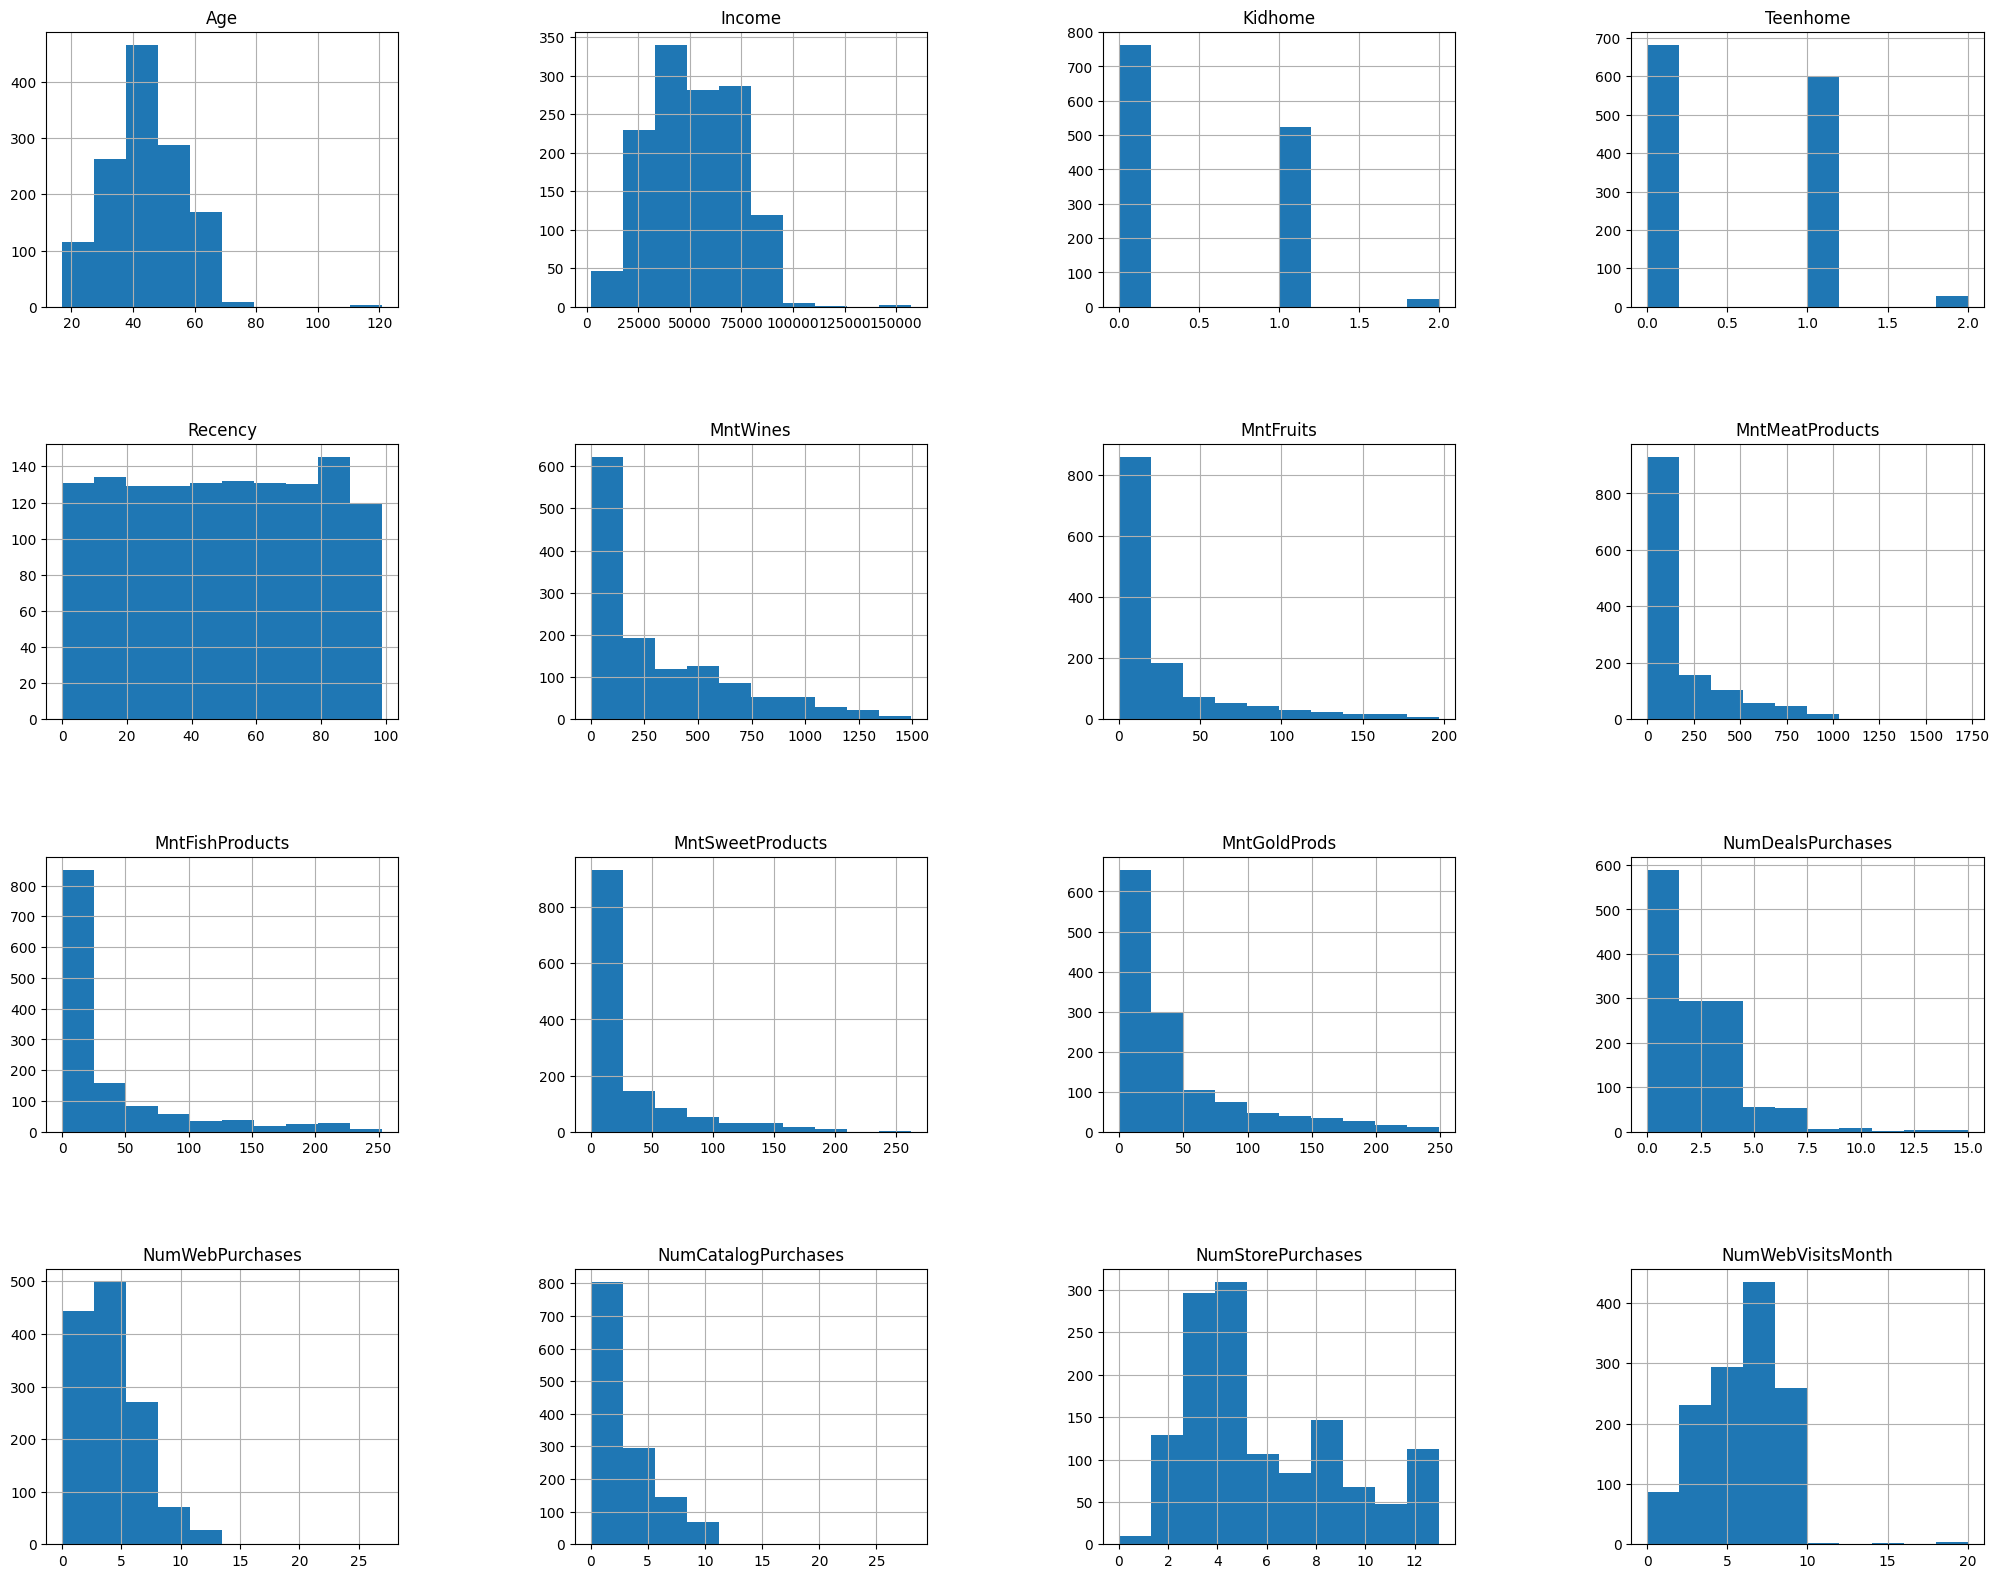

In [89]:
# Histogram for outliers

# data = df[['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
data = df[basic_stats_col]

plt.figure(figsize=(25, 25))
data.hist(layout=(5, 4), figsize=(25, 25))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

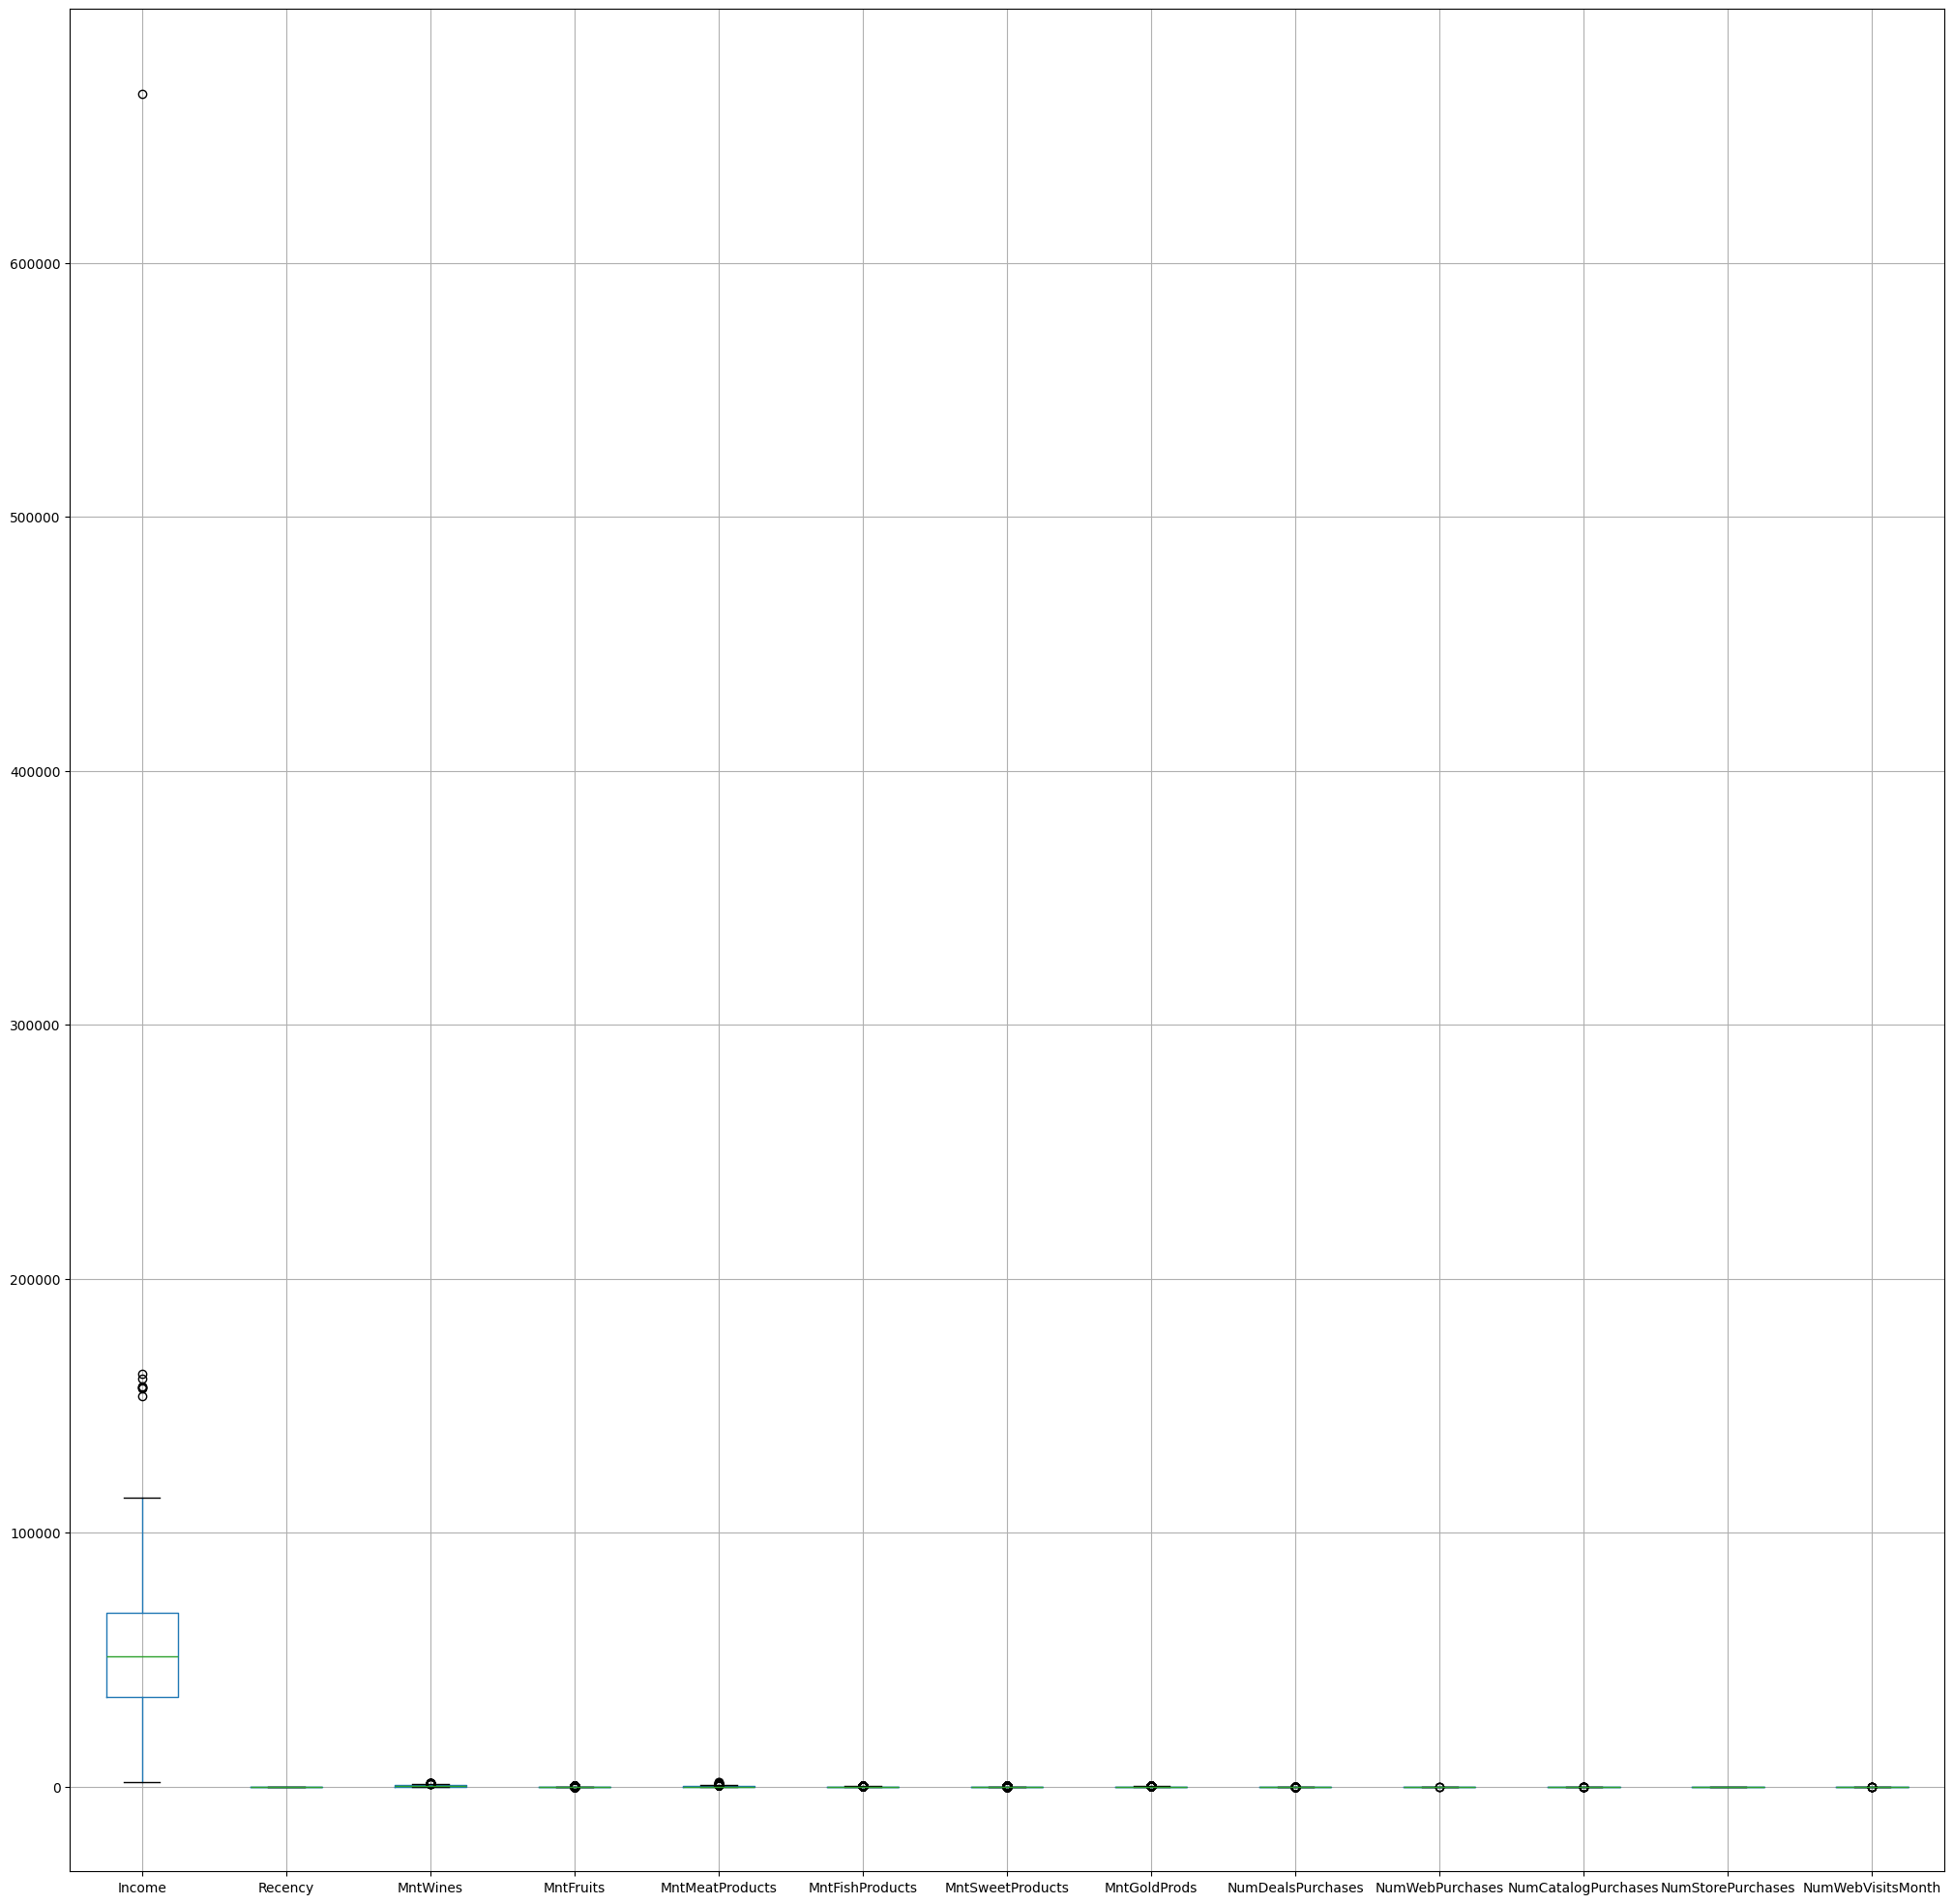

In [4]:
# Box plot for outliers

plt.figure(figsize=(25, 25))
data.boxplot()
plt.show()

In [5]:
# Identify outliers using IQR (Interquartile Range)
def filterRows(dataset, col):
	for iter in col:
		q1 = dataset[iter].quantile(0.25)
		q3 = dataset[iter].quantile(0.75)
		iqr = q3 - q1
		dataset = dataset[(dataset[iter] >= (q1 - (1.6 * iqr))) & (dataset[iter] <= (q3 + (1.6 * iqr)))]
	return dataset

clean_df = filterRows(df.copy(), basic_stats_col)
clean_df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
7,1991,1967-01-01,Graduation,Together,44931,0,1,2014-01-18,0,78,...,0,7,1,2,1,3,5,0,0,47
13,2964,1981-01-01,Graduation,Married,26872,0,0,2013-10-16,0,3,...,16,32,1,1,1,2,6,0,0,32
18,1473,1960-01-01,2n Cycle,Single,47823,0,1,2013-07-23,0,53,...,1,10,2,2,0,3,8,0,0,53
20,2285,1954-01-01,Master,Together,36634,0,1,2013-05-28,0,213,...,3,30,3,5,2,5,7,0,0,59
22,10470,1979-01-01,Master,Married,40662,1,0,2013-03-15,0,40,...,4,23,2,2,1,3,4,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,3846,1974-01-01,Graduation,Married,42557,0,1,2012-08-29,98,192,...,5,15,4,6,1,4,8,0,0,38
2228,7947,1969-01-01,Graduation,Married,42231,1,1,2014-03-25,99,24,...,1,4,1,1,0,3,5,0,0,45
2229,2106,1974-01-01,2n Cycle,Married,20130,0,0,2014-03-17,99,0,...,6,12,1,1,0,3,8,0,0,40
2230,3363,1974-01-01,2n Cycle,Married,20130,0,0,2014-03-17,99,0,...,6,12,1,1,0,3,8,0,0,40


**Deliverables**:

- Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



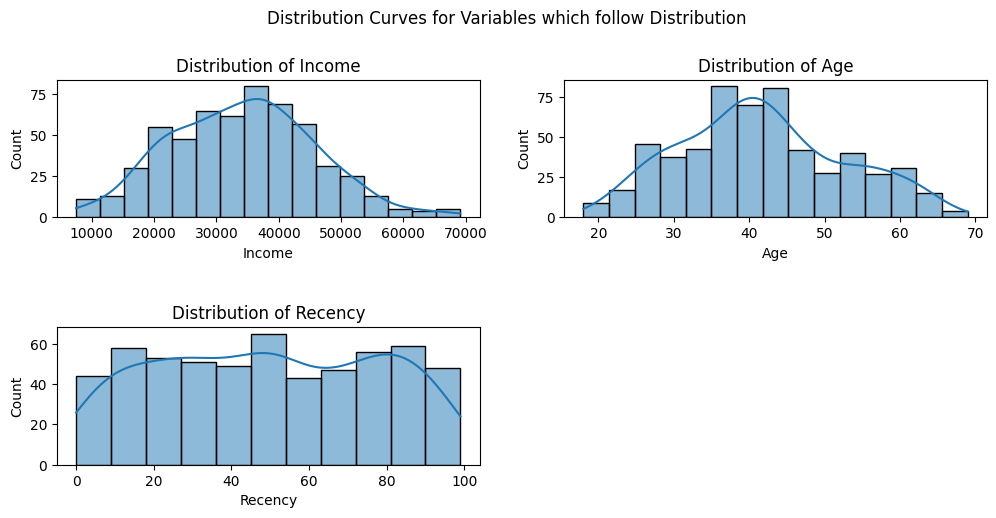

In [103]:
columns = ['Income', 'Age', 'Recency']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,5),gridspec_kw={'hspace': 0.8})
fig.suptitle('Distribution Curves for Variables which follow Distribution', y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, j in enumerate(columns):
	sns.histplot(clean_df[j], kde=True, ax=axes[i])
	axes[i].set_title(f'Distribution of {j}')

# Remove empty subplots
for i in range(len(columns), len(axes)):
	fig.delaxes(axes[i])

In [104]:
from scipy.stats import norm

me_inc = np.mean(clean_df['Income'])
std_inc = np.std(clean_df['Income'])

# Calculate probabilities
prob_les_thn_50000 = norm.cdf(50000, loc=me_inc, scale=std_inc)
prob_gre_thn_70000 = 1 - norm.cdf(70000, loc=me_inc, scale=std_inc)

print(f"Probability of income less than $700,00: {prob_les_thn_50000:.3f}")
print(f"Probability of income greater than $80,000: {prob_gre_thn_70000:.3f}")

# Calculate expected value (mean)
expected_income = me_inc
print(f"Expected income:", round(expected_income, 2))

Probability of income less than $700,00: 0.914
Probability of income greater than $80,000: 0.001
Expected income: 34207.53


In [10]:
me_age = np.mean(clean_df['Age'])
std_age = np.std(clean_df['Age'])

# Calculate probabilities
prob_les_thn_25 = scipy.stats.norm.cdf(25, loc=me_age, scale=std_age)
prob_gre_thn_40 = 1 - scipy.stats.norm.cdf(40, loc=me_age, scale=std_age)

print(f"Probability of age less than 30: {prob_les_thn_25:.2f}")
print(f"Probability of age greater than 40: {prob_gre_thn_40:.2f}")

# Calculate expected value (mean)
expected_age = me_age
print(f"Expected age: {expected_age:.2f}")

Probability of age less than 30: 0.06
Probability of age greater than 40: 0.56
Expected age: 41.67


In [11]:
me_rec = np.mean(clean_df['Recency'])
std_rec = np.std(clean_df['Recency'])

# Calculate probabilities
prob_les_thn_30 = scipy.stats.norm.cdf(30, loc=me_rec, scale=std_rec)
prob_gre_thn_45 = 1 - scipy.stats.norm.cdf(45, loc=me_rec, scale=std_rec)

print(f"Probability of recency less than 10: {prob_les_thn_30:.3f}")
print(f"Probability of recency greater than 15: {prob_gre_thn_45:.3f}")

# Calculate expected value (mean)
expected_recency = me_rec
print(f"Expected recency: {expected_recency:.2f}")

Probability of recency less than 10: 0.248
Probability of recency greater than 15: 0.561
Expected recency: 49.33


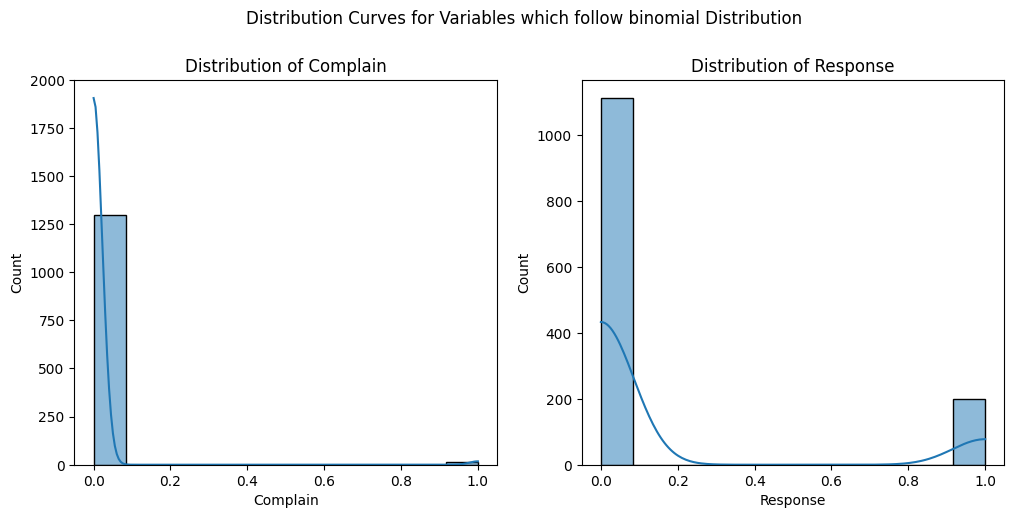

In [42]:
# Defining distribution of selecting variable
esse_var1=['Complain','Response']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5),gridspec_kw={'hspace': 0.8})
fig.suptitle('Distribution Curves for Variables which follow binomial Distribution', y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot distribution curves for each variable
for i, j in enumerate(esse_var1):
	sns.histplot(clean_df[j], kde=True, ax=axes[i])
	axes[i].set_title(f'Distribution of {j}')

In [12]:
from scipy.stats import binom

n_res = len(df['Response'])  # number of trials for Response
p_res = np.mean(df['Response'])  # probability of success for Response
k1 = 220      # No. of times getting 1

# Calculate probabilities using the PMF
prob_get_1_k1_times = binom.pmf(k1, n_res, p_res)

print(f"Probability of Response being 1: {prob_get_1_k1_times:.4f}")

# Calculate expected values (means)
expected_response = n_res * p_res

print(f"Expected value for Response: {expected_response:.2f}")

Probability of Response being 1: 0.0083
Expected value for Response: 199.00


In [13]:
n_complain = len(df['Complain'])  # number of trials for Complain
p_complain = np.mean(df['Complain'])  # probability of success for Complain
k2 = 5   # No of times for getting response 1

# Calculate probabilities using the PMF
prob_complain_1 = binom.pmf(k2, n_complain, p_complain)

print(f"Probability of Complain being 1: {prob_complain_1:.4f}")

# Calculate expected values (means)
expected_complain = n_complain * p_complain

print(f"Expected value for Complain: {expected_complain:.2f}")

Probability of Complain being 1: 0.0125
Expected value for Complain: 12.00


**Deliverables**:

- Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.


## Task 4: Insights and Customer Segmentation 📈

- Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.

**Deliverables**:

- Key insights regarding relationships between variables and distinct customer segments based on behaviors.

  

Text(0.5, 1.0, 'Correlation Heatmap')

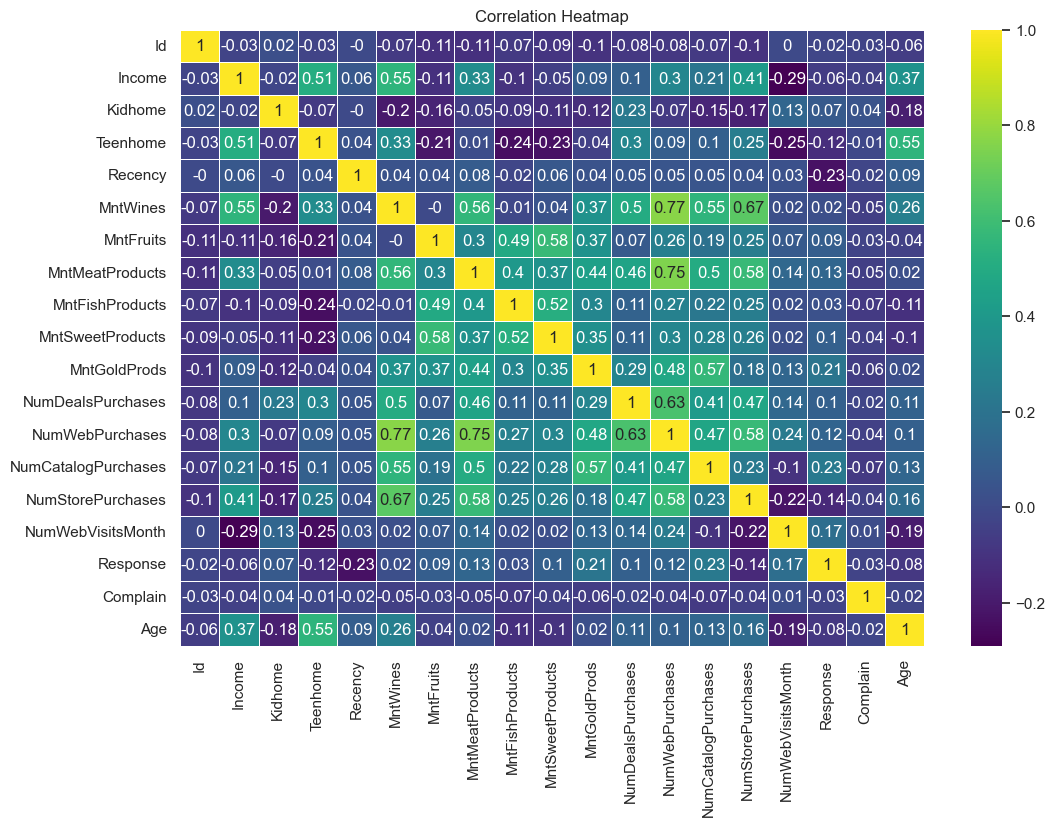

In [15]:
# Plotting the heatmap
cor_mat = clean_df.select_dtypes(include='number').corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(cor_mat, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')

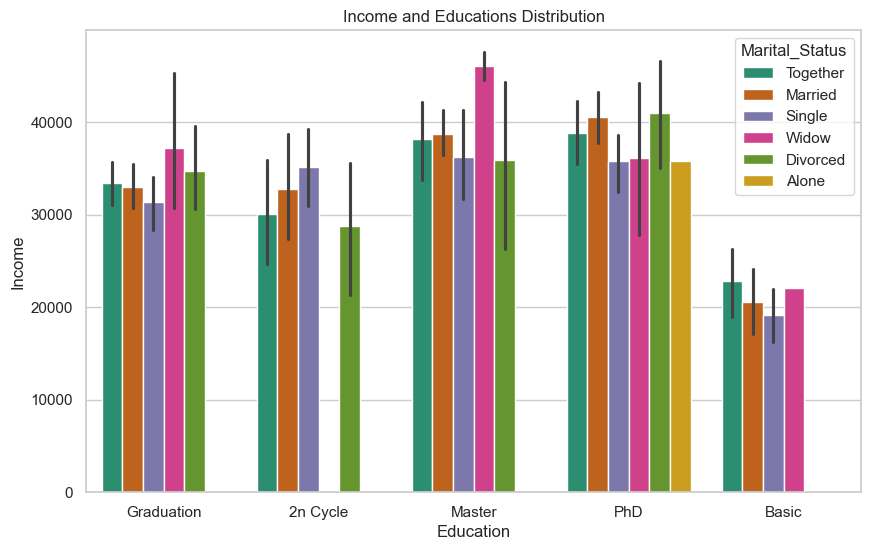

In [13]:
# Plotting the bar graph on Eduaction vs incomewith marital_status
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income',data=clean_df,hue='Marital_Status', palette='Dark2')
plt.title('Income and Educations Distribution')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

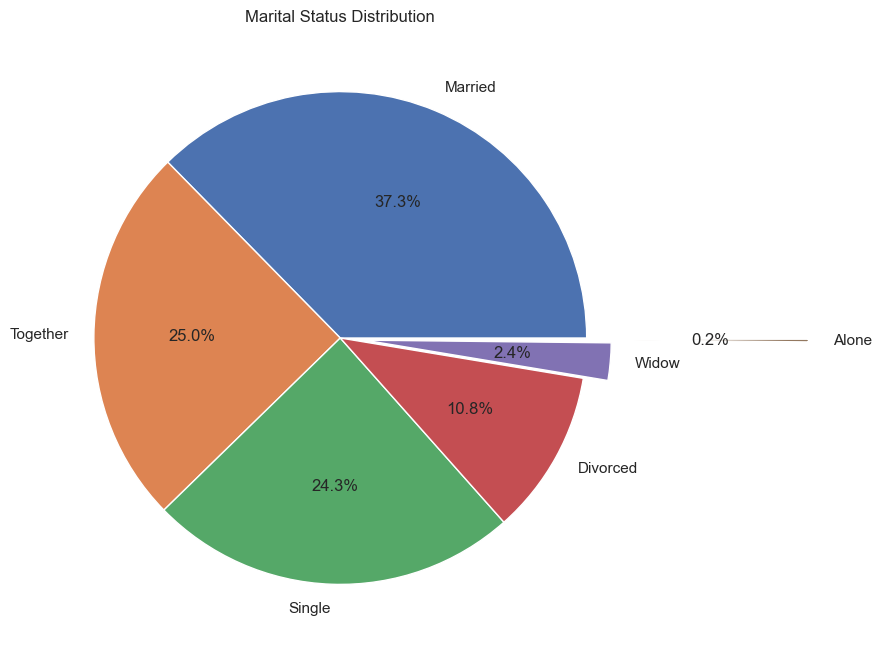

In [12]:
# Plot the pie chart for distribution of marital_status
marital_status_counts = clean_df['Marital_Status'].value_counts(normalize=True) * 100

# Create a pie chart with Seaborn and Matplot lib
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.pie(marital_status_counts, labels=marital_status_counts.index,explode=[0,0,0,0,0.1,0.9], autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

In [6]:
clean_df['TotalSpending'] = clean_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [7]:
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','TotalSpending']

# scaling our data
X_features = clean_df[features].values
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(X_features)

C:\Users\manut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

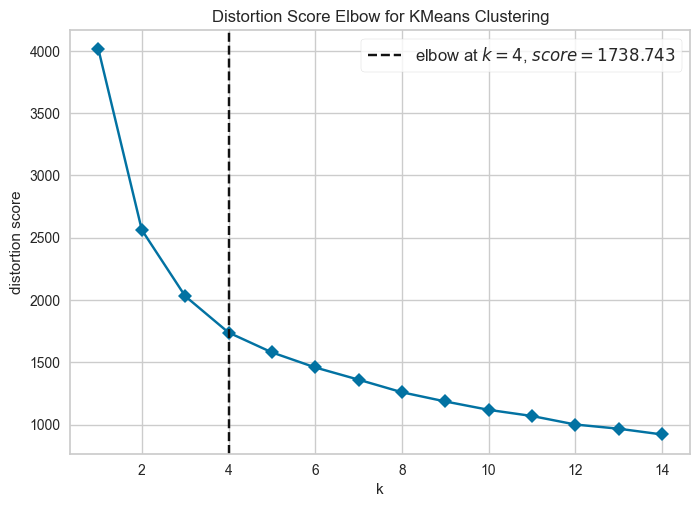

In [11]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
SSE = {}
for k in range(1,15):
	km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
	km = km.fit(X)
	SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

C:\Users\manut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


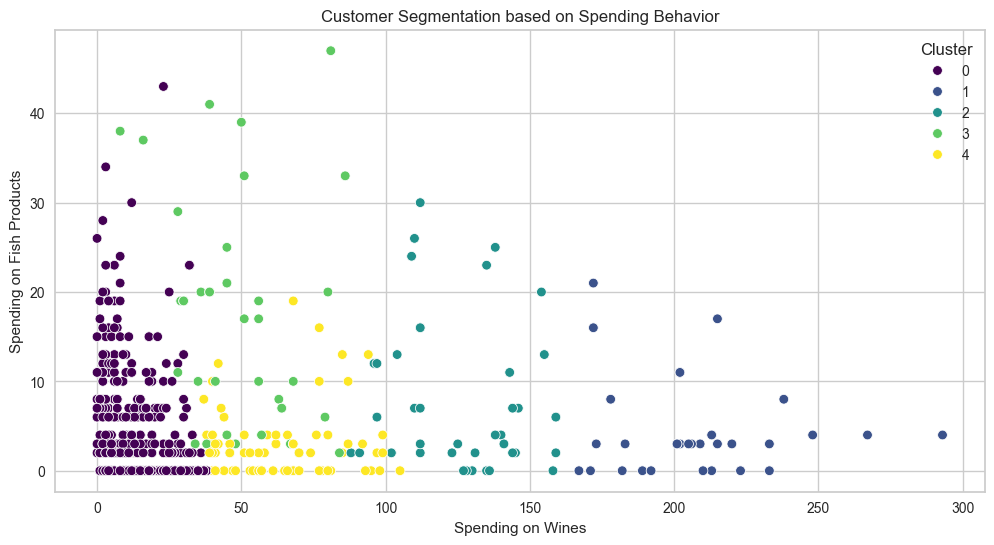

In [9]:
features_for_clustering = clean_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

num_clusters = 5

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clean_df['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MntWines', y='MntFishProducts', hue='Cluster', data=clean_df, palette='viridis')
plt.title('Customer Segmentation based on Spending Behavior')
plt.xlabel('Spending on Wines')
plt.ylabel('Spending on Fish Products')
plt.show()

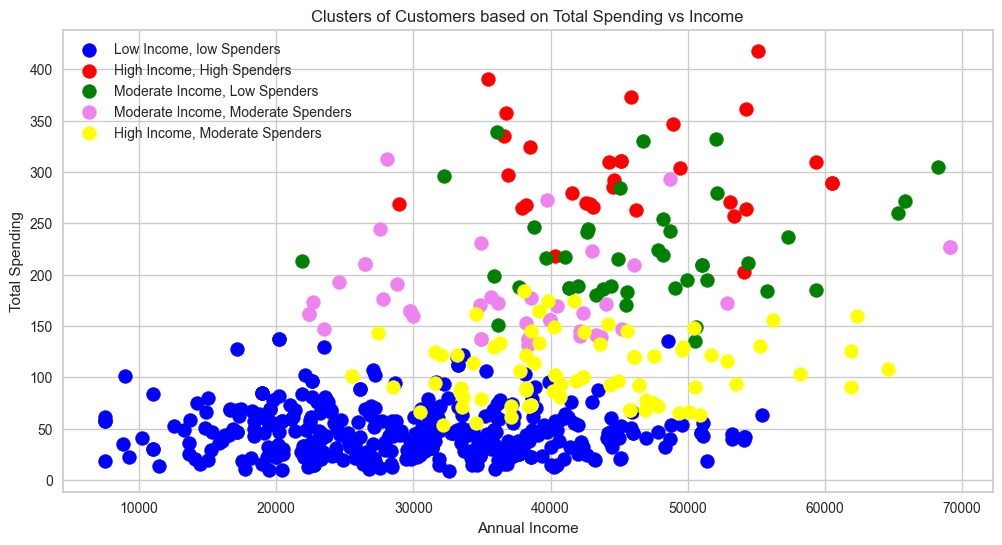

In [10]:
plt.figure(figsize = (12,6))

# Visualizing the clusters based on 'TotalSpending' and 'Income'
plt.scatter(clean_df[clean_df['Cluster'] == 0]['Income'], clean_df[clean_df['Cluster'] == 0]['TotalSpending'], s=100, c='blue', label='Low Income, low Spenders')
plt.scatter(clean_df[clean_df['Cluster'] == 1]['Income'], clean_df[clean_df['Cluster'] == 1]['TotalSpending'], s=100, c='red', label='High Income, High Spenders')
plt.scatter(clean_df[clean_df['Cluster'] == 2]['Income'], clean_df[clean_df['Cluster'] == 2]['TotalSpending'], s=100, c='green', label='Moderate Income, Low Spenders')
plt.scatter(clean_df[clean_df['Cluster'] == 3]['Income'], clean_df[clean_df['Cluster'] == 3]['TotalSpending'], s=100, c='violet', label='Moderate Income, Moderate Spenders')
plt.scatter(clean_df[clean_df['Cluster'] == 4]['Income'], clean_df[clean_df['Cluster'] == 4]['TotalSpending'], s=100, c='yellow', label='High Income, Moderate Spenders')

plt.title('Clusters of Customers based on Total Spending vs Income')
plt.xlabel('Annual Income')
plt.ylabel('Total Spending')
plt.legend()
plt.show()

## Task 5: Conclusion and Recommendations

- Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.

**Deliverables**:

- Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.

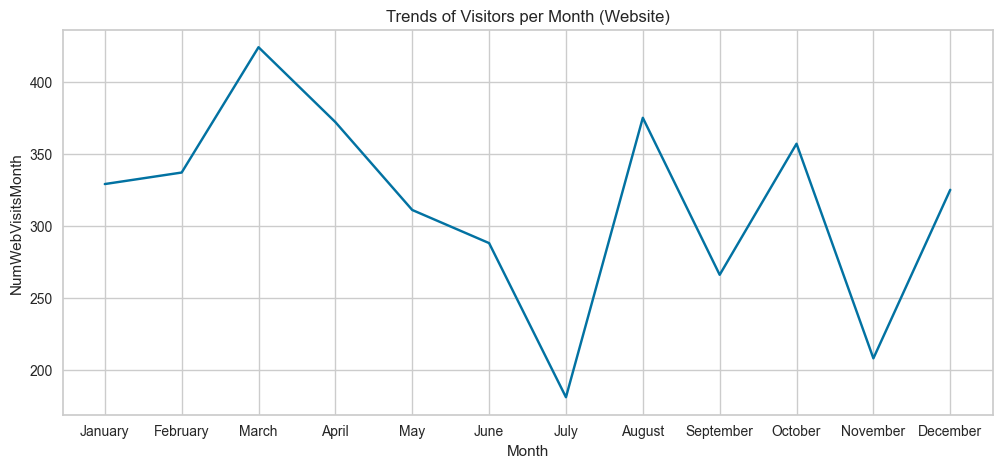

In [12]:
clean_df['Month'] = clean_df['Dt_Customer'].dt.strftime('%B')
mon_ord=['January','February','March','April','May','June','July','August','September','October','November','December']
clean_df['Month'] = pd.Categorical(clean_df['Month'], categories=mon_ord, ordered=True)

plt.figure(figsize = (12,5))
sns.lineplot(x='Month', y='NumWebVisitsMonth', data=clean_df.groupby('Month')['NumWebVisitsMonth'].sum().reset_index())
plt.title('Trends of Visitors per Month (Website)')
plt.show()

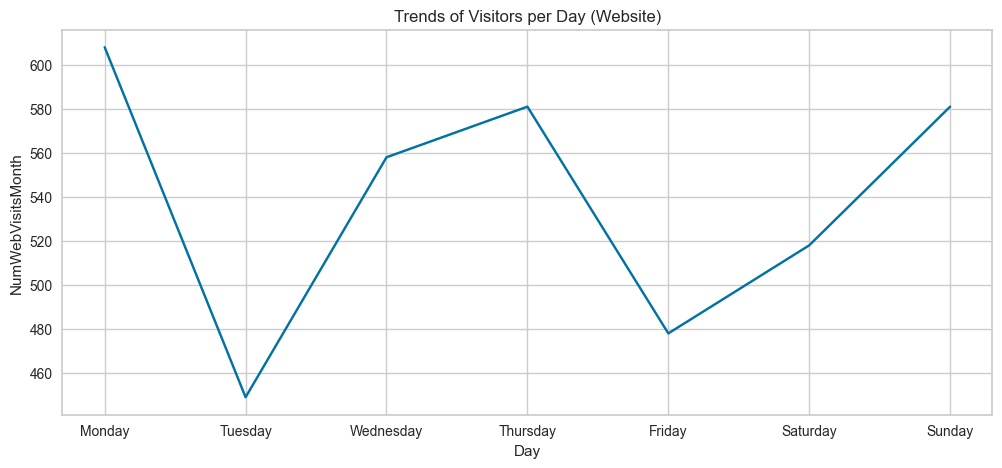

In [13]:
clean_df['Day'] = clean_df['Dt_Customer'].dt.strftime('%A')
week_ord = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
clean_df['Day'] = pd.Categorical(clean_df['Day'], categories=week_ord, ordered=True)

plt.figure(figsize=(12,5))
sns.lineplot(x='Day', y='NumWebVisitsMonth', data=clean_df.groupby('Day')['NumWebVisitsMonth'].sum().reset_index())
plt.title('Trends of Visitors per Day (Website)')
plt.show()

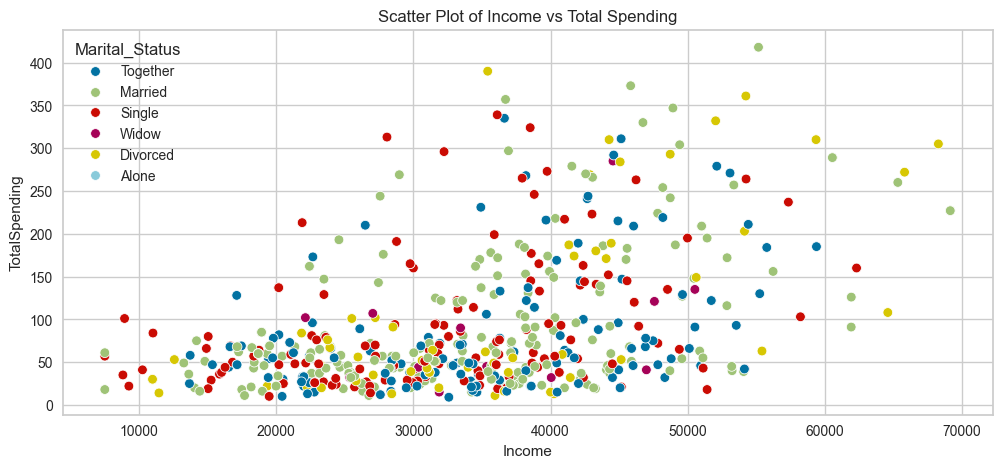

In [14]:
plt.figure(figsize = (12,5))
sns.scatterplot(x='Income', y='TotalSpending', hue='Marital_Status', data=clean_df)
plt.title('Scatter Plot of Income vs Total Spending')
plt.show()

C:\Users\manut\AppData\Local\Temp\ipykernel_9804\2155225417.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= clean_df['Recency_meter'],palette='viridis')


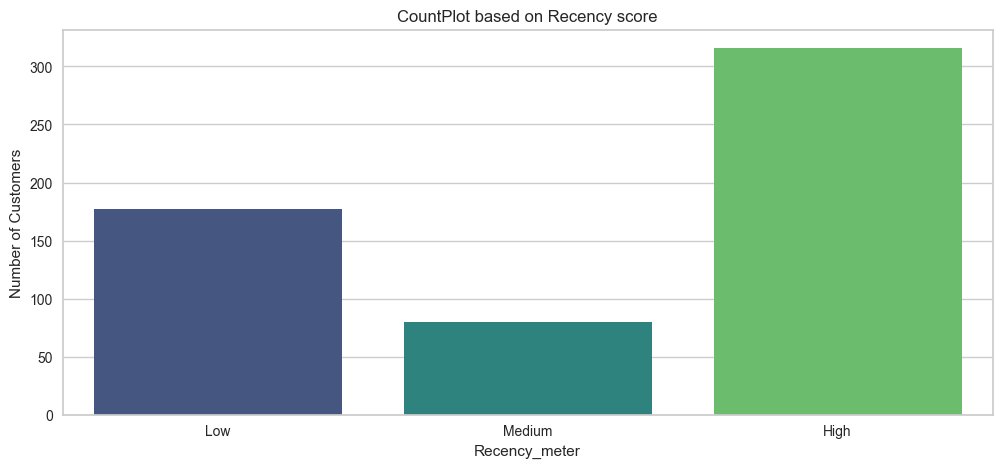

In [16]:
def rec_met(recency):
	if recency <= 30:
		return 'Low'
	elif 30 < recency <= 45:
		return 'Medium'
	else:
		return 'High'

clean_df['Recency_meter'] = clean_df['Recency'].apply(lambda x: rec_met(x))

plt.figure(figsize = (12,5))
sns.countplot(x=clean_df['Recency_meter'], palette='viridis')
plt.title('CountPlot based on Recency score')
plt.ylabel('Number of Customers')
plt.show()

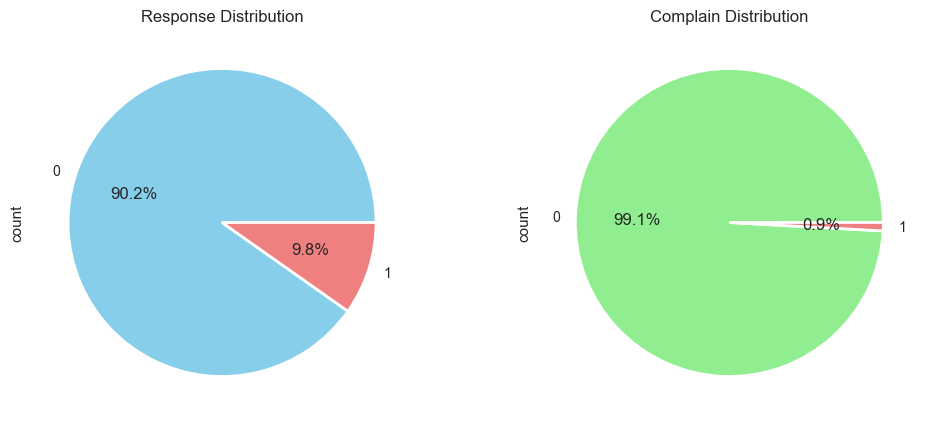

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the pie chart for 'Response'
clean_df['Response'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], wedgeprops=dict(linewidth=2, edgecolor='white'), ax=axes[0])
axes[0].set_title('Response Distribution')

# Plotting the pie chart for 'Complain'
clean_df['Complain'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], wedgeprops=dict(linewidth=2, edgecolor='white'), ax=axes[1])
axes[1].set_title('Complain Distribution')

plt.show()

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍